In [17]:
#enconding: utf-8 

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="UserWarning")
warnings.warn = lambda *a, **kw: False

import pandas as pd

# sep = ";" indica que o separador do banco de dados #Nesse caso é separado por vírgula
Banco4 = pd.read_csv("./NovosTestes/Banco4.csv", sep = ";" ) 

dir(Banco4)

print 'Banco com %d amostras e %d colunas\n' % Banco4.shape

print "Tabela sumarizando as colunas do banco\n"
print(Banco4.describe())
# "describe" descreve dados estatísticos do banco.


Banco com 416 amostras e 15 colunas

Tabela sumarizando as colunas do banco

            Idade        Sexo      Altura        Peso    QRS (ms)    P-R (ms)  \
count  416.000000  416.000000  416.000000  416.000000  416.000000  416.000000   
mean    46.346154    0.560096  163.701923   67.774038   88.769231  158.978365   
std     16.038970    0.496973   10.424605   15.181215   15.548435   36.750045   
min      1.000000    0.000000  105.000000   10.000000   55.000000    0.000000   
25%     36.000000    0.000000  160.000000   59.000000   80.000000  143.000000   
50%     46.000000    1.000000  164.000000   68.000000   86.000000  157.000000   
75%     58.000000    1.000000  170.000000   78.000000   94.000000  174.250000   
max     83.000000    1.000000  190.000000  124.000000  188.000000  524.000000   

         Q-T (ms)      T (ms)      P (ms)         QRS           T           P  \
count  416.000000  416.000000  416.000000  416.000000  416.000000  416.000000   
mean   368.245192  170.134615  

In [2]:
import numpy as np
   
Banco4.isnull().any()


Idade         False
Sexo          False
Altura        False
Peso          False
QRS (ms)      False
P-R (ms)      False
Q-T (ms)      False
T (ms)        False
P (ms)        False
QRS           False
T             False
P             False
QRST          False
Batimentos    False
Classe        False
dtype: bool

In [3]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (12,8))

Banco4.hist(ax = ax)

plt.tight_layout()
plt.show()



<Figure size 1200x800 with 16 Axes>

In [4]:
Banco4.loc[Banco4['Classe'] == 1, 'Classe'] = 0
Banco4.loc[Banco4['Classe'] > 1, 'Classe'] = 1
#Classe: 0 = Normal   1 = Arritmia

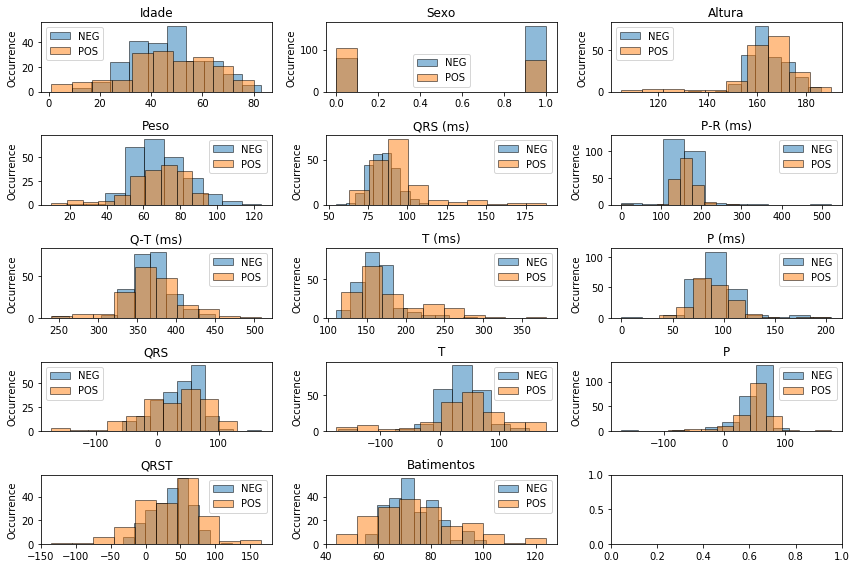

In [5]:
fig,axes = plt.subplots(5,3,figsize = (12,8))

npos = Banco4['Classe'].sum()
nneg = Banco4['Classe'].shape[0] - npos

i = j = 0

for idx, col in enumerate(Banco4.columns[:-1]):
    # Grupo 0: Casos Normais
    tmp0 = Banco4.loc[(Banco4.Classe == 0) & ~(Banco4[col].isnull()), col]

    # Grupo 1: Casos Arritimias
    tmp1 = Banco4.loc[(Banco4.Classe == 1) & ~(Banco4[col].isnull()), col]
    
    i = idx / 3
    j = idx % 3


    axes[i][j].hist(tmp0, label ='NEG', alpha = 0.5, lw = 1,edgecolor='black')

    axes[i][j].hist(tmp1, label ='POS', alpha = 0.5, lw = 1,edgecolor='black')

    axes[i][j].set_title(col)

    axes[i][j].set_ylabel('Occurrence')

    axes[i][j].legend()

    
plt.tight_layout()
plt.show();



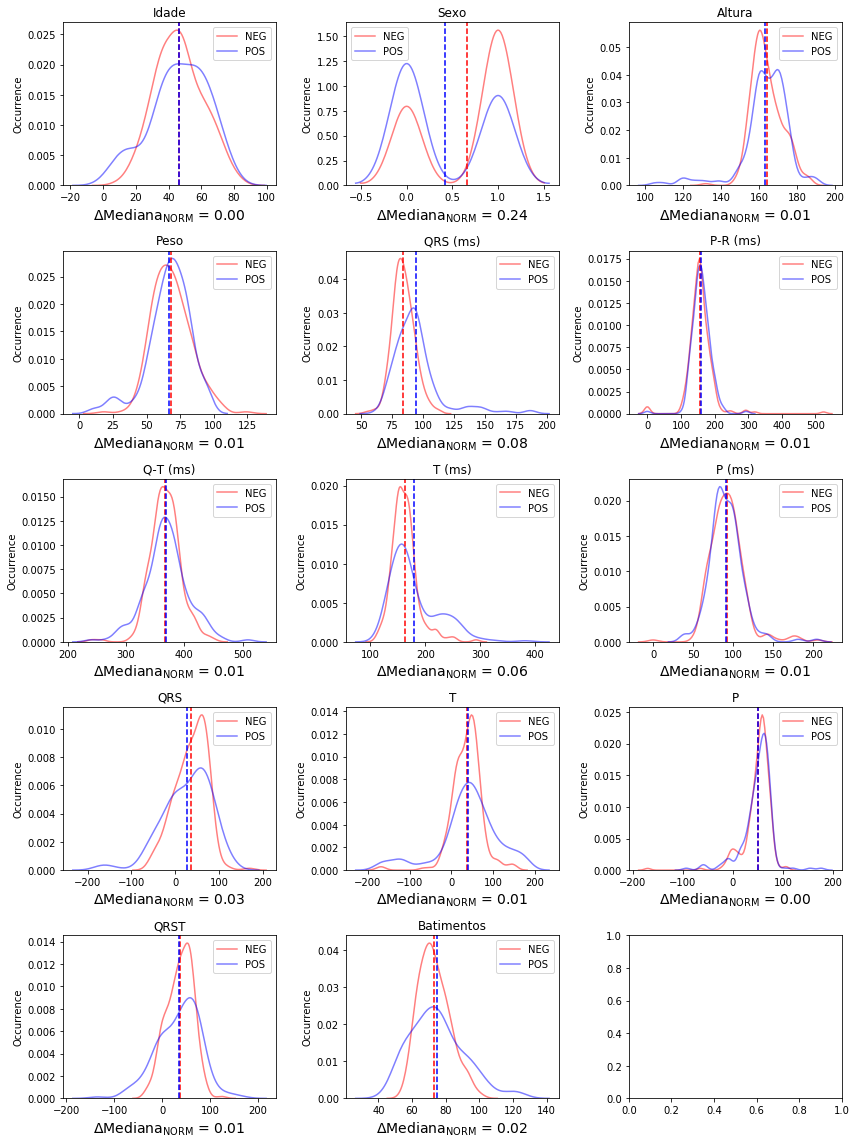

In [6]:
import seaborn as sns

fig,axes = plt.subplots(5,3,figsize = (12,16))

i = j = 0

for idx, col in enumerate(Banco4.columns[:-1]):
    #tmp0 = banco2.loc[banco2.Classe == 0, col]
    tmp0 = Banco4.loc[(Banco4.Classe == 0) & ~(Banco4[col].isnull()), col]
    
    #tmp1 = banco2.loc[banco2.Classe == 1, col]
    tmp1 = Banco4.loc[(Banco4.Classe == 1) & ~(Banco4[col].isnull()), col]
    
    i = idx / 3
    j = idx % 3
    
    sns.kdeplot(tmp0, ax = axes[i][j], label ='NEG', alpha = 0.5,c = 'r')
    
    sns.kdeplot(tmp1, ax = axes[i][j], label ='POS', alpha = 0.5,c = 'b')
    
    # cálculo das medianas e plotagem com a função axvline(x = mediana)
    median0 = tmp0.mean()
    median1 = tmp1.mean()
    
    #recebendo agora as médias
    
    axes[i][j].axvline(x=median0,c='r', linestyle='--')
    
    axes[i][j].axvline(x=median1,c='b', linestyle='--')
    
    axes[i][j].set_title(col)
    
    axes[i][j].set_ylabel('Occurrence')
    
    axes[i][j].legend()

    # vamos adicionar uma caixinha com a distância entre as medianas
    # vamor normalizar para interpretar essa distância independente da escala

    diff_med = abs(median0 - median1)
    min_val = Banco4[col].min()
    max_val = Banco4[col].max()

    diff_med_norm = (diff_med)/(max_val - min_val)
    
    axes[i][j].set_xlabel( r'$\Delta$Mediana$_{\mathrm{NORM}}$ = %.2f' % (diff_med_norm), fontsize=14)

plt.tight_layout()
plt.show();


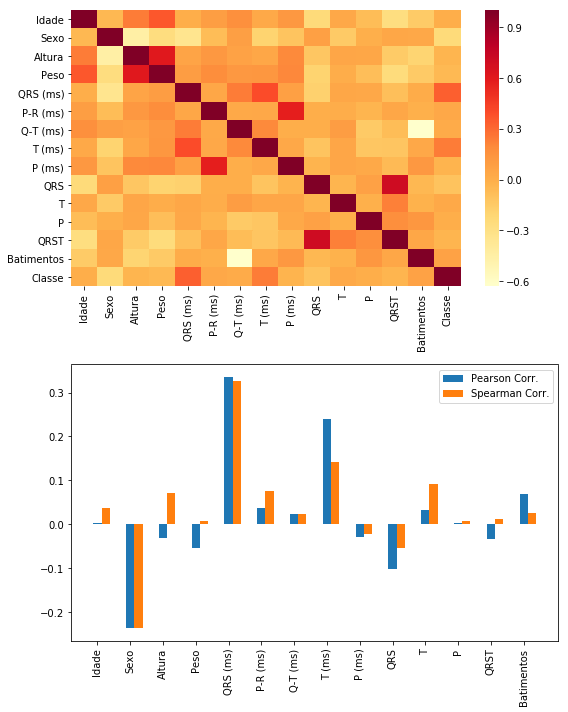

In [7]:
fig, axes = plt.subplots(2,1,figsize=(8,10))

# plotando as correlações entre atributos usando Pearson
sns.heatmap(Banco4.corr(), cmap = 'YlOrRd', ax = axes[0])

corr_pearson_vet = []
corr_spearman_vet = []

# para calcular Spearman, vamos ter que percorrer todas as colunas e fazer caso a caso
for col in Banco4.columns[:-1]:

    corr_pearson = Banco4[col].corr(Banco4['Classe'], method = "pearson")

    corr_spearman = Banco4[col].corr(Banco4['Classe'], method = "spearman")

    corr_pearson_vet.append(corr_pearson)
    corr_spearman_vet.append(corr_spearman)

# aqui vamos plotar as barras com as correlações de Pearson e Spearman
x_barra = np.array(range(1, len(Banco4.columns)))
axes[1].bar(x_barra, corr_pearson_vet, width=0.25, label = "Pearson Corr.")
axes[1].bar(x_barra+0.25,corr_spearman_vet, width=0.25, label = "Spearman Corr.")

# aqui vamos renomear os rótulos do eixo X para colocar os nomes dos nossos atributos

axes[1].set_xticks(range(1,Banco4.columns.shape[0]))
axes[1].set_xticklabels(Banco4.columns, rotation=90)

axes[1].legend()

plt.tight_layout()
plt.show()

In [8]:
import statsmodels.api as sm
 
glm = sm.GLS(Banco4["Classe"], sm.add_constant(Banco4.drop(["Classe"], axis=1)))
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                 Classe   R-squared:                       0.178
Model:                            GLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     6.205
Date:                Tue, 14 May 2019   Prob (F-statistic):           3.10e-11
Time:                        13:39:35   Log-Likelihood:                -257.06
No. Observations:                 416   AIC:                             544.1
Df Residuals:                     401   BIC:                             604.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0661      0.687      0.096      0.923      -1.284       1.416
Idade          0.0015      0.002      0.947      0.344      -0.002       0.005
Sexo          -0.2026      0.057     -3.531      0.000      -0.315      -0.090
Altura        -0.0031      0.003     -1.029      0.304      -0.009       0.003
Peso          -0.0039      0.002     -1.948      0.052      -0.008    3.62e-05
QRS (ms)       0.0072      0.002      3.968      0.000       0.004       0.011
P-R (ms)       0.0013      0.001      1.710      0.088      -0.000       0.003
Q-T (ms)       0.0003      0.001      0.280      0.779      -0.002       0.002
T (ms)         0.0016      0.001      2.301      0.022       0.000       0.003
P (ms)        -0.0025      0.001     -1.874      0.062      -0.005       0.000
QRS           -0.0007      0.001     -0.903      0.367      -0.002       0.001
T          -8.481e-05      0.000     -0.188      0.851      -0.001       0.001
P              0.0001      0.001      0.178      0.859      -0.001       0.002
QRST           0.0002      0.001      0.179      0.858      -0.002       0.002
Batimentos     0.0026      0.003      1.052      0.293      -0.002       0.008
==============================================================================
Omnibus:                      934.069   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.535
Skew:                           0.425   Prob(JB):                     3.52e-10
Kurtosis:                       1.662   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
train_cols = Banco4.columns[:-1]
X = Banco4[train_cols]
y = Banco4['Classe']

mLogit = sm.Logit(y,X)

mLogit_res = mLogit.fit()
mLogit_res.summary()

Optimization terminated successfully.
         Current function value: 0.575335
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Classe   No. Observations:                  416
Model:                          Logit   Df Residuals:                      402
Method:                           MLE   Df Model:                           13
Date:                Tue, 14 May 2019   Pseudo R-squ.:                  0.1581
Time:                        13:40:05   Log-Likelihood:                -239.34
converged:                       True   LL-Null:                       -284.29
                                        LLR p-value:                 1.456e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Idade          0.0077      0.008      0.988      0.323      -0.008       0.023
Sexo          -0.9117      0.288     -3.162      0.002      -1.477      -0.347
Altura        -0.0352      0.012     -2.947      0.003      -0.059      -0.012
Peso          -0.0195      0.010     -2.003      0.045      -0.039      -0.000
QRS (ms)       0.0591      0.013      4.416      0.000       0.033       0.085
P-R (ms)       0.0077      0.004      1.901      0.057      -0.000       0.016
Q-T (ms)   -9.781e-05      0.004     -0.023      0.982      -0.008       0.008
T (ms)         0.0068      0.004      1.920      0.055      -0.000       0.014
P (ms)        -0.0144      0.007     -2.049      0.040      -0.028      -0.001
QRS           -0.0079      0.005     -1.469      0.142      -0.019       0.003
T             -0.0011      0.002     -0.466      0.641      -0.006       0.004
P              0.0021      0.005      0.456      0.648      -0.007       0.011
QRST           0.0054      0.007      0.798      0.425      -0.008       0.019
Batimentos     0.0102      0.010      0.974      0.330      -0.010       0.031
==============================================================================
"""

Aqui dava para computar o **prevalence ratio** dos atributos Sexo e idade.
https://www.ctspedia.org/do/view/CTSpedia/PrevalenceRatio


In [10]:
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


tmp = X.Sexo[:]
tmp[tmp ==0 ] = 2
tmp[tmp == 1] = 0
tmp[tmp == 2] = 1

cf = confusion_matrix(tmp, y, labels=[0,1])

print cf
print X.Sexo.value_counts()
PR = float( cf[0,0]/float(cf[0,0]+cf[0,1]) ) / (cf[1,0]/float(cf[1,0]+cf[1,1]))
print 'Prevalence Ratio', PR


[[157  76]
 [ 80 103]]
0    233
1    183
Name: Sexo, dtype: int64
Prevalence Ratio 1.541362660944206


- Isso parece dizer a incidência de arritmia é 54% maior em homens do que em mulheres.
- Vale computar o Confidence Interval para 95%, mas não sei fazer isso (dever de casa).


In [11]:
y_pred = mLogit_res.predict(X)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
#print y_pred, y

y_rate = (y==y_pred).mean()
print y_rate

0.5961538461538461


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [13]:
mLogit = sm.Logit(y_train,X_train)

mLogit_res = mLogit.fit()
print mLogit_res.summary()

Optimization terminated successfully.
         Current function value: 0.559476
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Classe   No. Observations:                  278
Model:                          Logit   Df Residuals:                      264
Method:                           MLE   Df Model:                           13
Date:                Tue, 14 May 2019   Pseudo R-squ.:                  0.1909
Time:                        13:40:36   Log-Likelihood:                -155.53
converged:                       True   LL-Null:                       -192.23
                                        LLR p-value:                 1.888e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Idade         -0.0070      0.010     -0.702      0.483      -0.027       0.013
Sexo           1.2858      0.

In [14]:
y_pred = mLogit_res.predict(X_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

y_rate = (y_test==y_pred).mean()
print y_rate

0.6739130434782609


Automatically created module for IPython interactive environment


MemoryError: 

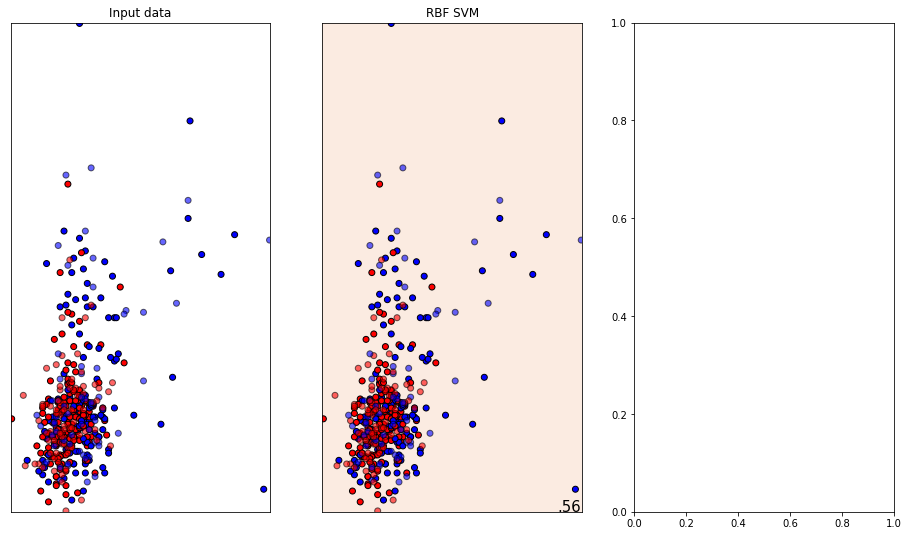

In [15]:
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

train_cols = Banco4.columns[:-1]
X = Banco4[train_cols]
y = Banco4['Classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train = X_train.loc[:, ["QRS (ms)", "T (ms)"]]

X_test = X_test.loc[:, ["QRS (ms)", "T (ms)"]]

h = .02  # step size in the mesh

#names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
 #        "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
  #       "Naive Bayes", "QDA"]

names = ["RBF SVM", "Decision Tree", "Random Forest", "Neural Net"]


classifiers = [
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),]


figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets


    # just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)

ax.set_title("Input data")


    # Plot the training points
ax.scatter(X_train[ 'QRS (ms)'], X_train['T (ms)'], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
ax.scatter(X_test['QRS (ms)'], X_test['T (ms)'], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

x_min, x_max =  X[ 'QRS (ms)'].min() - .5, X[ 'QRS (ms)'].max() + .5
y_min, y_max =  X['T (ms)'].min() - .5, X['T (ms)'].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    #print 'Rnu
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[ 'QRS (ms)'], X_train[ 'T (ms)'], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[ 'QRS (ms)'], X_test[ 'T (ms)'], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()